# Downloading and Prepping Data

In [1]:
import numpy as np
import pandas as pd
from PIL import Image #converting images into arrays

In [2]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_can.shape)

(195, 43)


In [5]:
df_can = df_can.iloc[:195, :43]
df_can.shape

(195, 43)

In [6]:
#clean up the dataset to remove unnecessary columns (eg.REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# rename the columns so that they make sense
df_can.rename(columns = {
    'OdName':'Country',
    'AreaName' :'Continent',
    'RegName':'Region'
}, inplace=True)

# for sake of consistency, let's alseo make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59


In [7]:
# set the country name as index - usefull for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

#add total columns
df_can['Total']= df_can.sum(axis=1)

#years rhat we will be using in this lesson
#useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimension', df_can.shape)

data dimension (195, 38)


# Visualizing data using Matplotlib

In [8]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffles charts

mpl.style.use('ggplot') # optional: for ggplot style

#check for latest version of Matplotlib
print('Matplotlib version: ',mpl.__version__)

Matplotlib version:  3.1.1


# Waffle charts (Optional)
waffle chart adalah visualisasi yang biasanya dibuat untuk menampilkan progress menuju tujuan

waffle untuk menambah fitur visualisasi yang sebagian besar terdiri dari sel, seperti dasbor excel

In [9]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


## Step 1
menentukan proporsi setiap kategori yang sehubungan dengan totalnya

In [10]:
#compute the proportion of each category with repect to the total 

total_values = sum(df_dsn['Total'])
category_proportions = [(float(value)/total_values) for value in df_dsn['Total']]

#print out proportions
for i , proportion in enumerate (category_proportions):
    print(df_dsn.index.values[i]+ ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


## Step 2
menentukan ukuran keseluruhan dari waffle chart

In [11]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


## Step 3
menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori

In [12]:
# compute the number of tiles for each category 
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

#print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i], ':', str(tiles))

Denmark : 129
Norway : 77
Sweden : 194


## Step 4 
membuat matriks yang menyerupai waffle dan mengisinya

In [13]:
#initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

#define indice to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        #if the number of tiles populated for the current category is equal to its corresponding allocated tiles..
        if tile_index > sum(tiles_per_category[0:category_index]):
            #..proceed to the next category
            category_index += 1
        
        # set the class value to an integer , which increases with class
        waffle_chart[row, col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [14]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

## Step 5
petakan waffle chart menjadi visual

<Figure size 432x288 with 0 Axes>

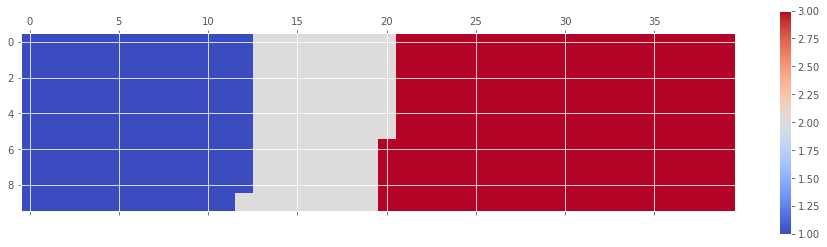

In [15]:
#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

## Step 6
percantik chart

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

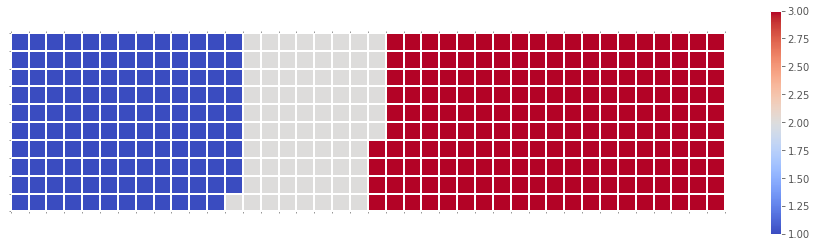

In [16]:
#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

## Step 7
tambahkan legend!

<Figure size 432x288 with 0 Axes>

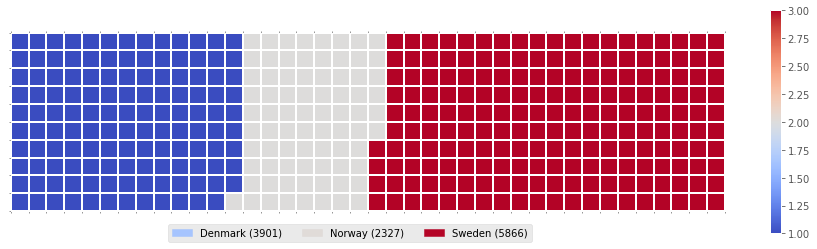

In [17]:
#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#compute cumulative sum of individual categories to match schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color = color_val, label = label_str))

# add legend to chart
plt.legend(handles = legend_handles,
           loc='lower center',
           ncol = len(df_dsn.index.values),
           bbox_to_anchor = (0., -0.2, 0.95, .1)
          )

sangat tidak efisien untuk mengilangi ketujuh langkah tersbeyt.
jadi gabungkan semuanya menjadi satu fungsi yang akan mengambil parameter 

In [18]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign =''):
    #compute the proportion of each category with respect to the total 
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]
    
    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print('Total number of tiles is', total_num_tiles)
    
    #compute the total number of tiles for each category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    #print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i], ':', str(tiles))
        
    
    #initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    #define indice to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            #if the number of tiles populated for the current category is equal to its corresponding allocated tiles..
            if tile_index > sum(tiles_per_category[0:category_index]):
                #..proceed to the next category
                category_index += 1

            # set the class value to an integer , which increases with class
            waffle_chart[row, col] = category_index
    
    #instantiate a new figure object
    fig = plt.figure()

    #use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap = colormap)
    plt.colorbar()
    
    #get the axis
    ax = plt.gca()

    #set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    #add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    #compute cumulative sum of individual categories to match schemes between chart and legend
    values_cumsum = np.cumsum(df_dsn['Total'])
    total_values = values_cumsum[len(values_cumsum) - 1]

    #create legend
    legend_handles = []
    for i, category in enumerate(df_dsn.index.values):
        label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color = color_val, label = label_str))

    # add legend to chart
    plt.legend(handles = legend_handles,
               loc='lower center',
               ncol = len(df_dsn.index.values),
               bbox_to_anchor = (0., -0.2, 0.95, .1)
              )

sekarang saatnya untuk menentukan parameter input

In [19]:
width = 40
height = 10

categories = df_dsn.index.values #Categories
values = df_dsn['Total'] #corresponding values of categories

colormap = plt.cm.coolwarm #color map index

Total number of tiles is 400
Denmark : 129
Norway : 77
Sweden : 194


<Figure size 432x288 with 0 Axes>

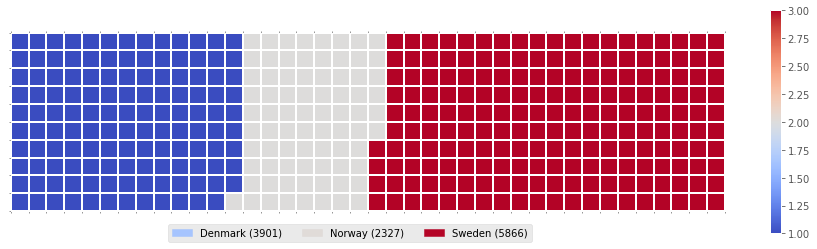

In [20]:
#panggil fungsi
create_waffle_chart(categories, values, height, width, colormap)

# Word Clouds

In [21]:
!pip install wordcloud

In [22]:
from wordcloud import WordCloud, STOPWORDS

print('WordCloud is installed and imported')

WordCloud is installed and imported


In [23]:
import wget
wget.download('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt')

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

100% [............................................................................] 145192 / 145192File downloaded and saved!


In [24]:
stopwords = set(STOPWORDS)

In [25]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)
# generate the word cloud
alice_wc.generate(alice_novel)

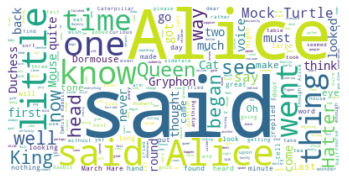

In [26]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

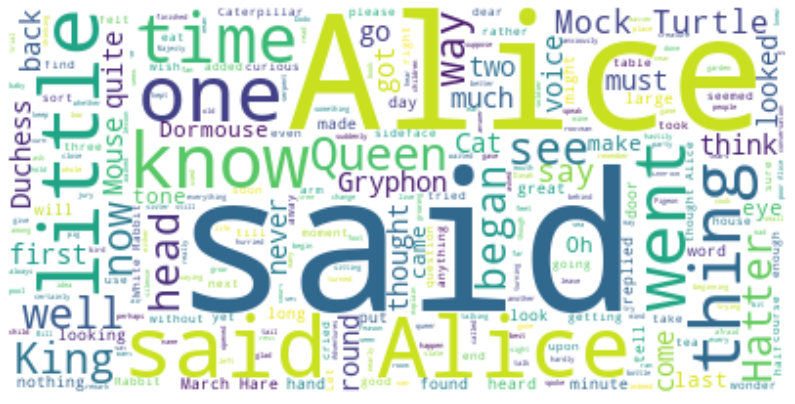

In [27]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

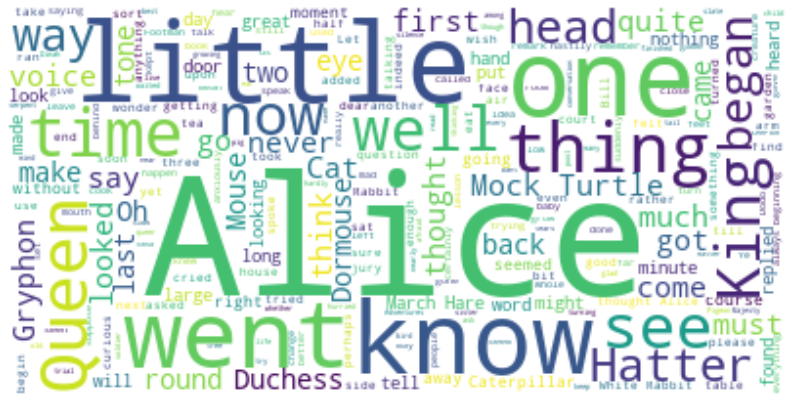

In [28]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# download image
wget.download('https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png')

#save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

100% [................................................................................] 7339 / 7339Image downloaded and saved!


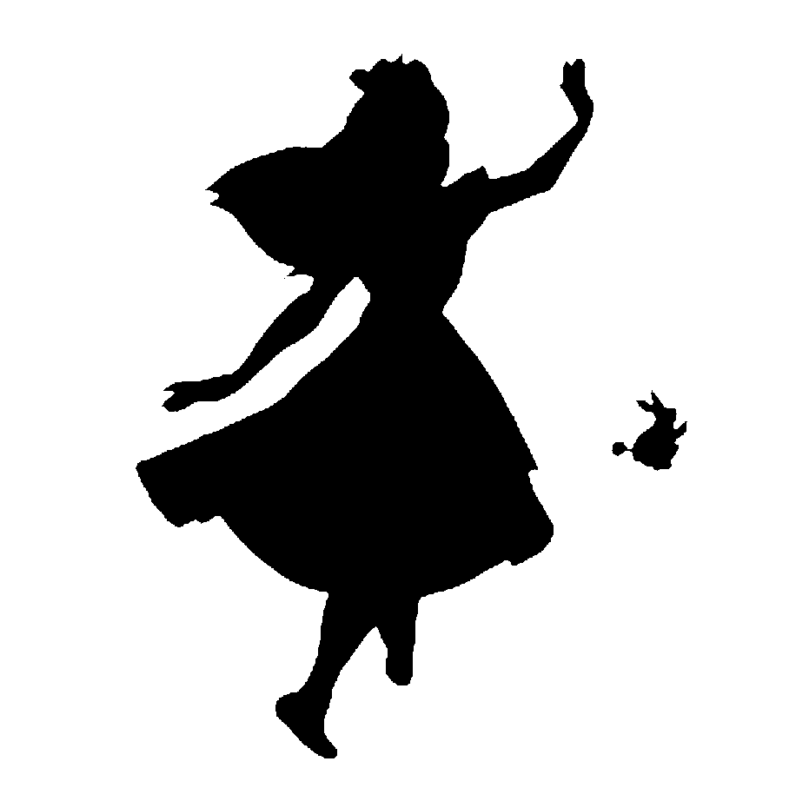

In [30]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

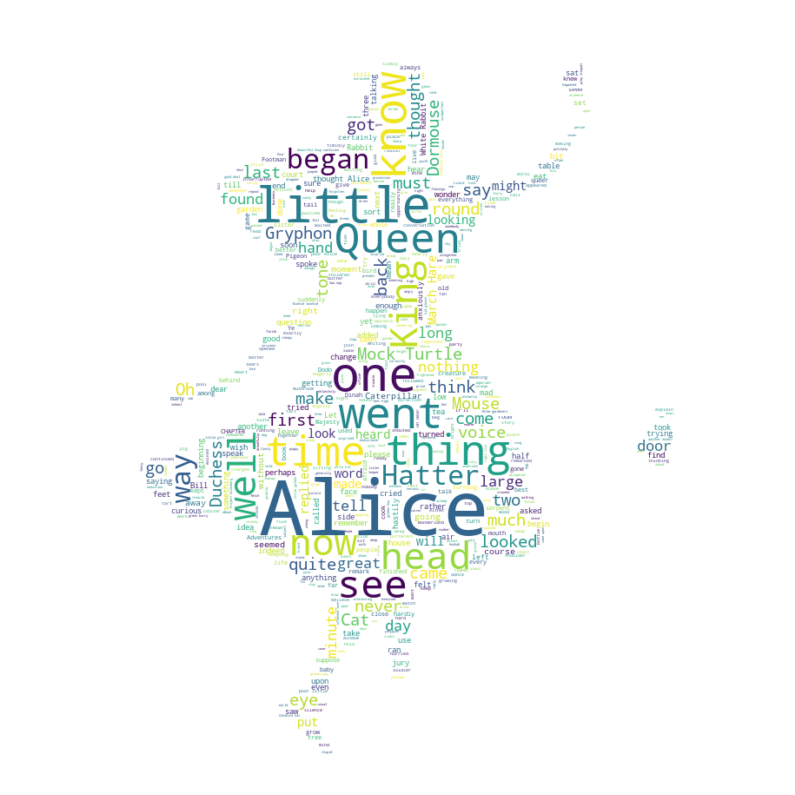

In [31]:
#instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

#generate the word cloud
alice_wc.generate(alice_novel)

#display the word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [33]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [34]:
max_word = 90
word_string = ''

for country in df_can.index.values:
    #check if country's name is a single word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)* max_word)
        word_string = word_string + ((country + ' ') * repeat_num_times)

#display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [35]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('word cloud created!')

word cloud created!


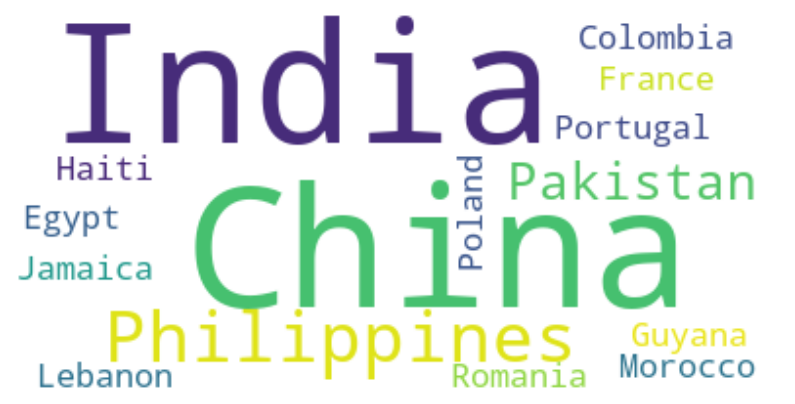

In [36]:
#display the word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plots

In [37]:
!pip install seaborn

In [38]:
import seaborn as sns
print('seaborn installed and imported')

seaborn installed and imported


In [39]:
# sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

#change year to type float 
df_tot.index = map(float, df_tot.index)

#reset the index to put back in as a column
df_tot.reset_index(inplace=True)

# rename column
df_tot.columns = ['year', 'total']

#view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


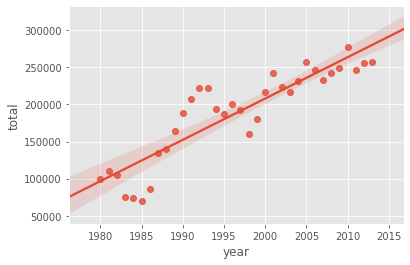

In [40]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

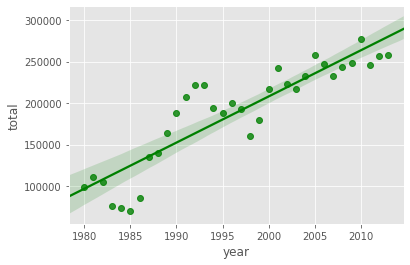

In [41]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

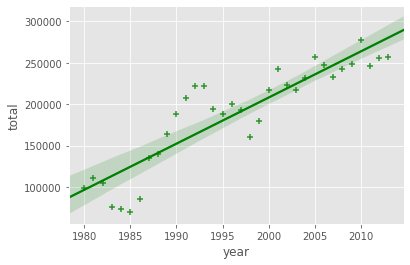

In [42]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

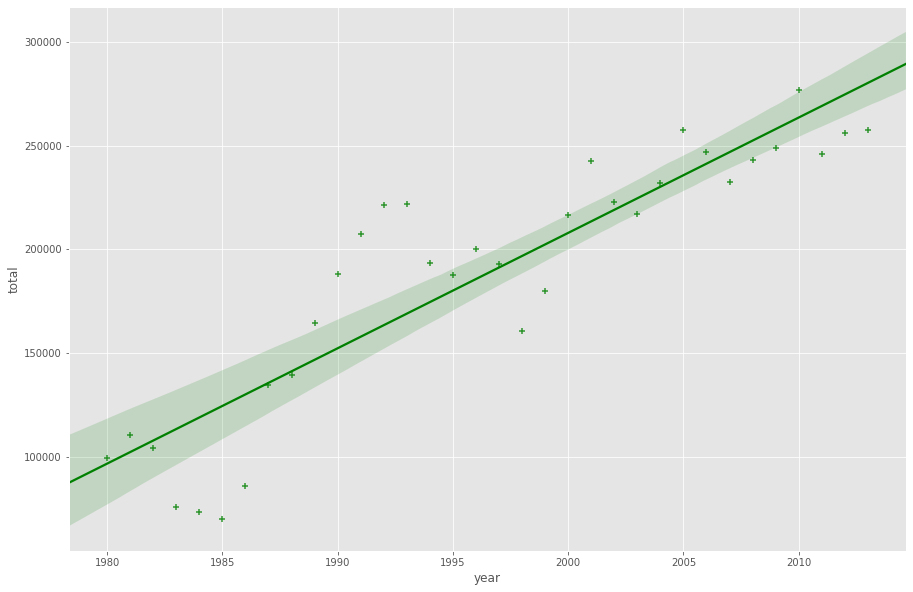

In [43]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

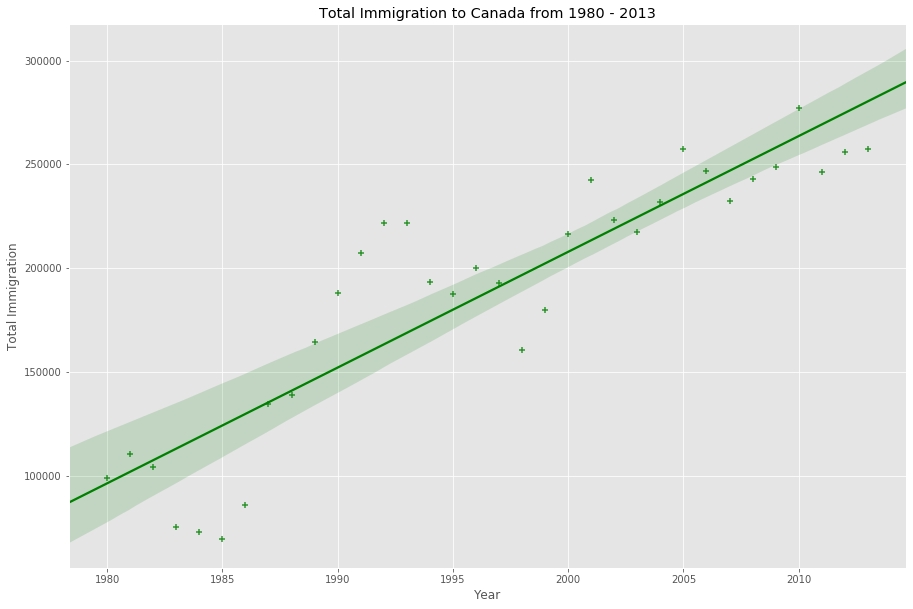

In [44]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
scatter_kws={'s':200}

ax.set(xlabel='Year', ylabel='Total Immigration') #add x and y labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

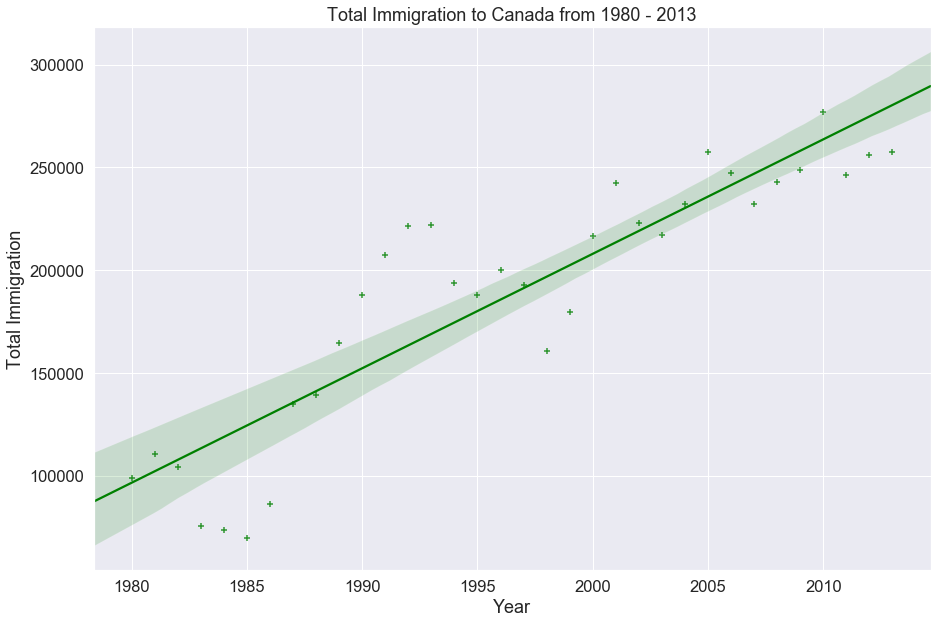

In [45]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
scatter_kws={'s':200}

ax.set(xlabel='Year', ylabel='Total Immigration') #add x and y labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

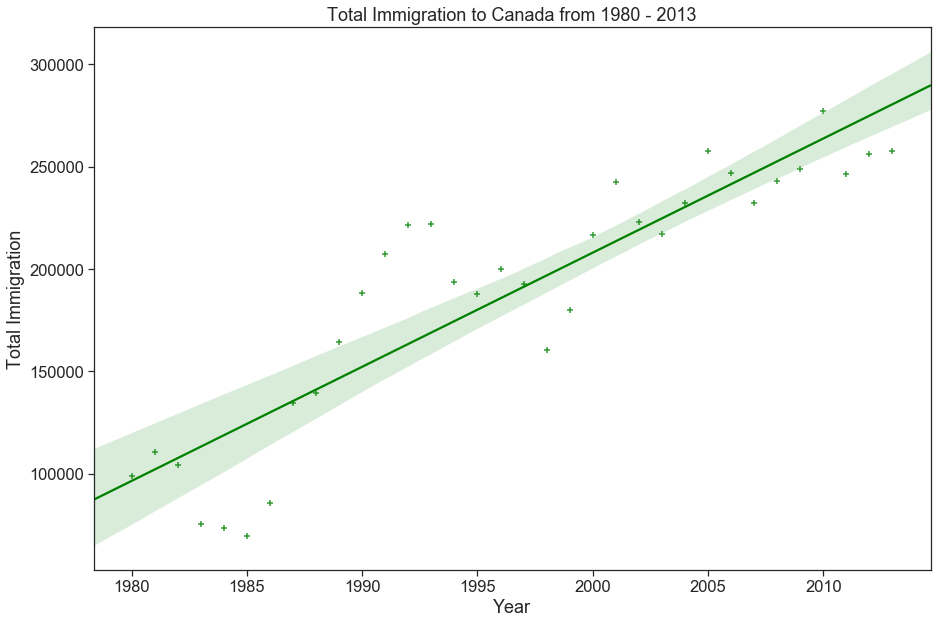

In [46]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('ticks') #set background to white background
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
scatter_kws={'s':200}

ax.set(xlabel='Year', ylabel='Total Immigration') #add x and y labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

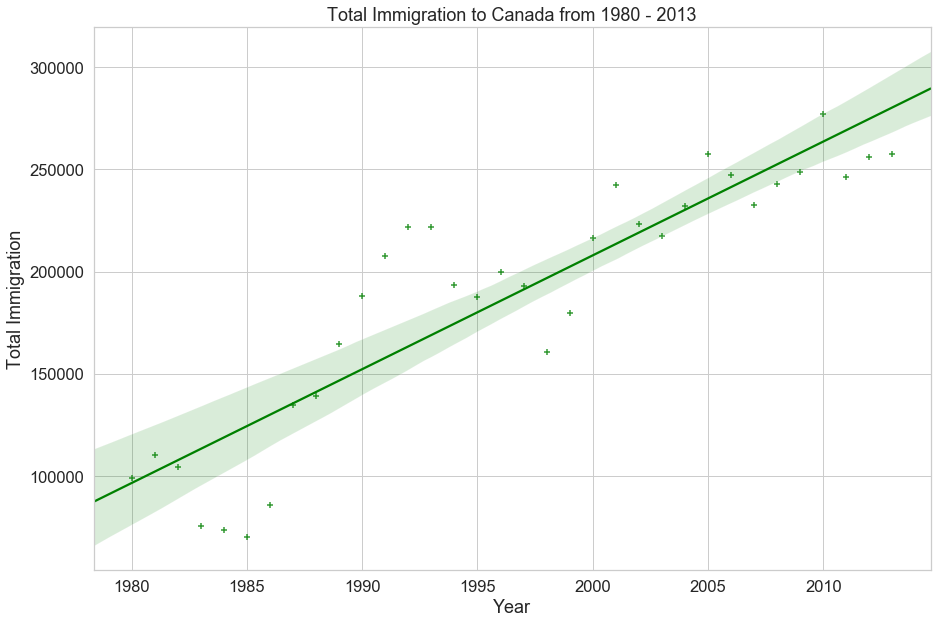

In [47]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid') #set background to white grid
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
scatter_kws={'s':200}

ax.set(xlabel='Year', ylabel='Total Immigration') #add x and y labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

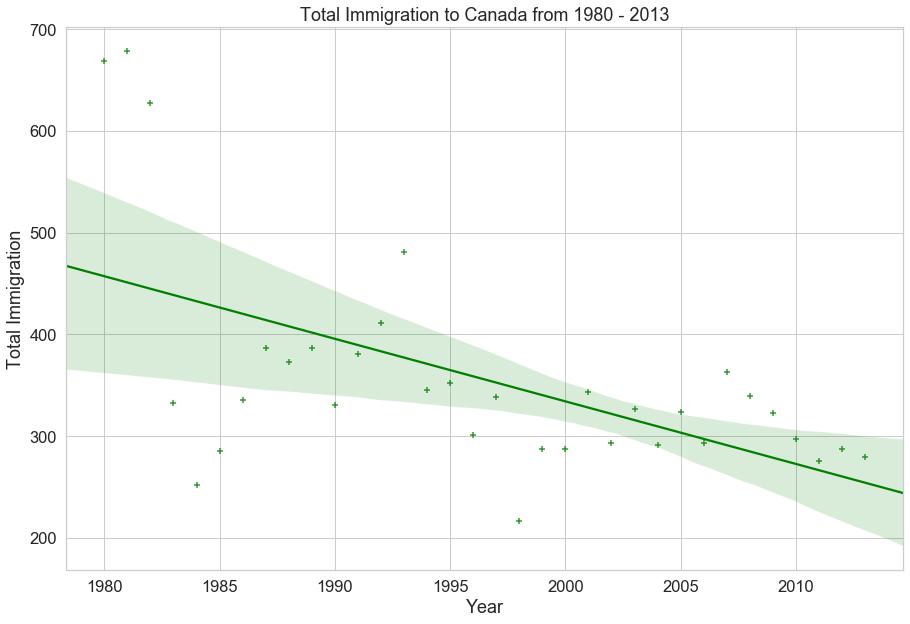

In [48]:
df_countries = df_can.loc[['Denmark','Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns=['year', 'total']
df_total['year'] = df_total['year'].astype(int)
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid') #set background to white grid
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')
scatter_kws={'s':200}

ax.set(xlabel='Year', ylabel='Total Immigration') #add x and y labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') #add title

# Part 2

# Folium

In [49]:
!pip install folium

In [50]:
import folium
print('Folium installed and imported!')

Folium installed and imported!


In [51]:
#Define the world map
world_map = folium.Map()

#display the world map
world_map

In [52]:
#Define the world map centered around semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

#display the world map
world_map

In [53]:
#Define the world map centered around semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

#display the world map
world_map

In [54]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=15)

#display the world map
world_map

## Stamen Toner Maps
peta B+W dengan kontras tinggi

In [55]:
#create a stamen tomer map of the world centered around semarang
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=13, tiles='Stamen Toner')

#display the world map
world_map

## Stamen Terrain Maps
peta bayangan bukit dan warna vegetasi alami

In [56]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=13, tiles='Stamen Terrain')

#display the world map
world_map

## Maps with Markers

In [57]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [58]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [59]:
df_incidents.shape

(150500, 13)

In [60]:
# get the first 100 crimes in the df_incident dataframe
limit=100
df_incidents = df_incidents.iloc[0:limit, :]

In [61]:
df_incidents.shape

(100, 13)

In [62]:
# san fransisco lantitude and longitude values
latitude = 37.77
longitude = -122.42

In [63]:
#create map and display it
sanfran_map = folium.Map(location=[latitude,longitude], zoom_start=12)

#display the map of san fransisco
sanfran_map

In [64]:
#instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color=0.6,
            fill_opacity=0.6
        )
    )

#add incidents to map
sanfran_map.add_child(incidents)

In [67]:
#instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color=0.6,
            fill_opacity=0.6
        )
    )
#add pop up text to each amrkers on the map 
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

#add incidents to map
sanfran_map.add_child(incidents)

In [68]:
#create map and display it
sanfran_map = folium.Map(location=[latitude,longitude], zoom_start=12)

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(sanfran_map)

#show map
sanfran_map

In [69]:
from folium import plugins

#lets start again with a clen copy of the map of san fransisco
sanfran_map = folium.Map(location=[latitude,longitude], zoom_start=12)

#instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
        folium.Marker(
            location=[lat, lng],
            icon=None, 
            popup=label
        ).add_to(incidents)

#show map
sanfran_map

# Choropleth Maps

In [70]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [71]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [72]:
print(df_can.shape)

(195, 43)


In [73]:
#clean up the dataset to remove unnecessary columns (eg.REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# rename the columns so that they make sense
df_can.rename(columns = {
    'OdName':'Country',
    'AreaName' :'Continent',
    'RegName':'Region'
}, inplace=True)

# for sake of consistency, let's alseo make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

#add total column 
df_can['Total'] = df_can.sum(axis=1)

#years that we will be using in this lesson
years = list(map(str, range(1980, 2014)))
print('data dimension', df_can.shape)

data dimension (195, 39)


In [74]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [75]:
wget.download('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json')

print('GeoJSON file downloaded!')

100% [............................................................................] 252515 / 252515GeoJSON file downloaded!


In [77]:
world_geo = r'world_countries.json' # geojson file

#create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Stamen Terrain')

#generate choropleth map using the total immigration of each countries to Canada from 1980 to 2013

world_map.choropleth(
    geo_data = world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #yellow, orange, red
    fill_opacity=-0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

#display map
world_map

C:\Users\aqfie\Anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
